In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [405]:
matplotlib.style.use('ggplot')

#A parse date variable to pass in the read_csv function later to take into account the date format 
parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')

In [406]:
train_data = pd.read_csv('D:/Users/bdhooda/Desktop/BESL docs/train_subset_1000000.csv/train_subset_1000000.csv', parse_dates = ['hour'],date_parser = parse_date )

In [407]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 24 columns):
id                  999999 non-null float64
click               999999 non-null int64
hour                999999 non-null datetime64[ns]
C1                  999999 non-null int64
banner_pos          999999 non-null int64
site_id             999999 non-null object
site_domain         999999 non-null object
site_category       999999 non-null object
app_id              999999 non-null object
app_domain          999999 non-null object
app_category        999999 non-null object
device_id           999999 non-null object
device_ip           999999 non-null object
device_model        999999 non-null object
device_type         999999 non-null int64
device_conn_type    999999 non-null int64
C14                 999999 non-null int64
C15                 999999 non-null int64
C16                 999999 non-null int64
C17                 999999 non-null int64
C18                 999999 no

In [408]:
train_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


0    0.839781
1    0.160219
Name: click, dtype: float64

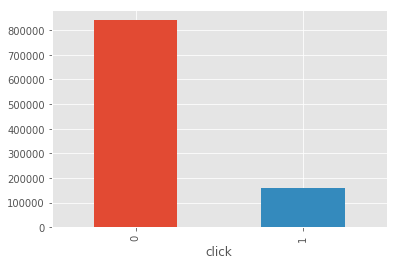

In [409]:
train_data.groupby('click').size().plot(kind = 'bar')
rows = train_data.shape[0]

click_through_rate = train_data['click'].value_counts()/rows 

click_through_rate

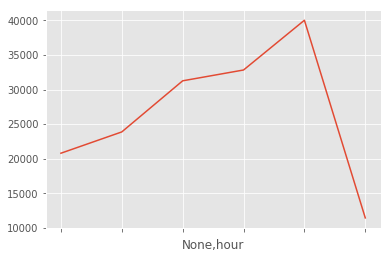

In [410]:
df_impressions = train_data.groupby('hour').agg({'click':'sum'})
df_impressions.unstack().plot()


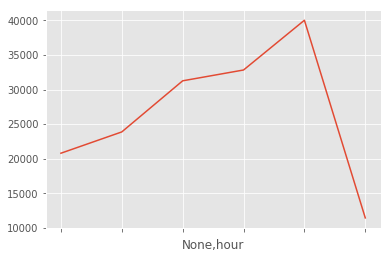

In [411]:
df_click = train_data[train_data['click']==1]
temp_click = df_click.groupby('hour').agg({'click' : 'sum'})
temp_click.unstack().plot()

In [412]:
train_data.hour.describe()

count                  999999
unique                      6
top       2014-10-21 04:00:00
freq                   264711
first     2014-10-21 00:00:00
last      2014-10-21 05:00:00
Name: hour, dtype: object

In [413]:
train_data['hour_in_day'] = train_data['hour'].apply(lambda val : val.hour)

In [414]:
train_data['weekday'] = train_data['hour'].apply(lambda val: val.dayofweek)

In [415]:
train_data['day_name'] = train_data['hour'].apply(lambda x: x.strftime('%A'))

In [416]:
train_data.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_in_day',
       'weekday', 'day_name'],
      dtype='object')

In [417]:
train_data.hour_in_day.max()

5

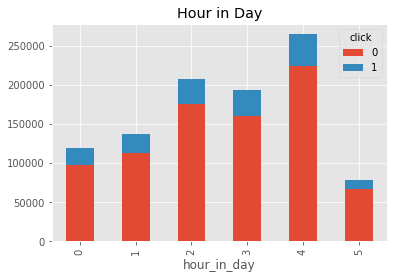

In [418]:
train_data.groupby(['hour_in_day', 'click']).size().unstack().plot(kind='bar', stacked=True, title="Hour in Day")

In [419]:
train_data[['hour','click']].groupby(['hour']).sum().sort_values('click',ascending=False)

,click
hour,
2014-10-21 04:00:00,40026
2014-10-21 03:00:00,32830
2014-10-21 02:00:00,31265
2014-10-21 01:00:00,23873
2014-10-21 00:00:00,20792
2014-10-21 05:00:00,11433


In [420]:
train_data_clicks[['hour','click']].groupby(['hour']).sum().sort_values('click',ascending=False)

,click
hour,
2014-10-21 04:00:00,40026
2014-10-21 03:00:00,32830
2014-10-21 02:00:00,31265
2014-10-21 01:00:00,23873
2014-10-21 00:00:00,20792
2014-10-21 05:00:00,18712


In [421]:
hour = pd.DataFrame()

In [422]:
train_data_clicks=train_data[train_data['click']==1]

In [423]:
hour['hr'] = train_data_clicks[['hour_in_day','click']].groupby(['hour_in_day']).count().reset_index().sort_values('click',ascending=False)['hour_in_day']

In [424]:
hour['pos_clicks'] = train_data_clicks[['hour_in_day','click']].groupby(['hour_in_day']).count().reset_index().sort_values('click',ascending=False)['click']

In [425]:
hour['impressions_total'] = train_data[['hour_in_day','click']].groupby(['hour_in_day']).count().reset_index().sort_values('click',ascending=False)['click']

In [426]:
hour['click_through_rate'] = 100*hour['pos_clicks']/hour['impressions_total']

In [427]:
hour.sort_values(ascending = False, by = 'click_through_rate')

,hr,pos_clicks,impressions_total,click_through_rate
0,0,20792,119006,17.471388
1,1,23873,137442,17.369509
3,3,32830,193355,16.979132
4,4,40026,264711,15.120641
2,2,31265,207471,15.069576
5,5,11433,78014,14.655062


In [428]:
list_of_hours = hour.sort_values(by='click_through_rate',ascending=False)['hr'].tolist()

In [429]:
list_of_hours

[0, 1, 3, 4, 2, 5]

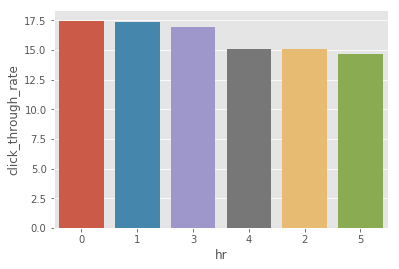

In [430]:
import seaborn as sns
sns.barplot(y='click_through_rate',x='hr',data=hour,order=list_of_hours)

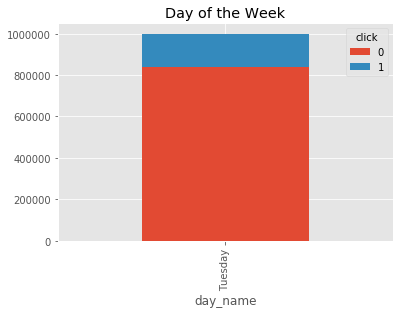

In [431]:
train_data.groupby(['day_name','click']).size().unstack().plot(kind='bar', stacked=True, title="Day of the Week")

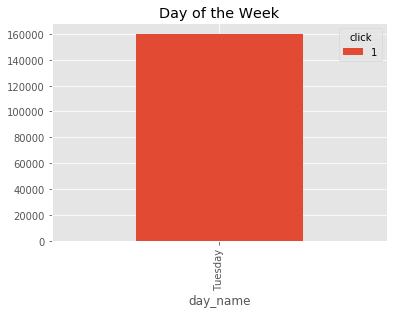

In [432]:
train_data_clicks.groupby(['day_name','click']).size().unstack().plot(kind='bar', stacked=True, title="Day of the Week")

In [433]:
train_data_clicks[['day_name','click']].groupby(['day_name']).count().sort_values('click',ascending=False)

,click
day_name,
Tuesday,160219


In [434]:
day = pd.DataFrame()

In [435]:
day['day'] = train_data_clicks[['day_name','click']].groupby(['day_name']).count().reset_index().sort_values('click',ascending=False)['day_name']
day 

,day
0,Tuesday


In [436]:
day['pos_clicks'] = train_data_clicks[['day_name','click']]\
                        .groupby(['day_name']).count()\
                        .reset_index()\
                        .sort_values('click',ascending=False)['click']

In [437]:
day['total_impressions'] = train_data[['day_name','click']].groupby(['day_name']).count().reset_index().sort_values('click',ascending=False)['click']
day

,day,pos_clicks,total_impressions
0,Tuesday,160219,999999


In [438]:
day['click_pct'] = 100*day['pos_clicks']/day['total_impressions']
day.sort_values(ascending = False, by = 'click_pct')

,day,pos_clicks,total_impressions,click_pct
0,Tuesday,160219,999999,16.021916


In [439]:
list_of_days = day.sort_values(by='click_pct',ascending=False)['day'].tolist()

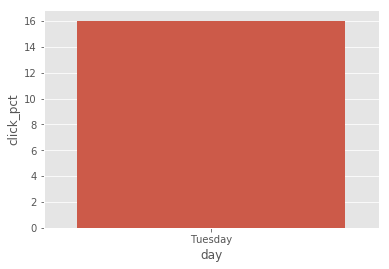

In [440]:
sns.barplot(y='click_pct',x='day'\
            ,data=day\
            ,order=list_of_days)

In [441]:
train_data['banner_pos'].unique()

array([0, 1, 4, 5, 2, 7, 3], dtype=int64)

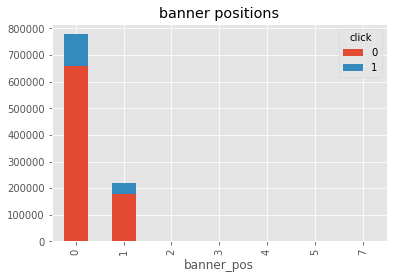

In [442]:
banner_temp =train_data[['banner_pos','click']].groupby(['banner_pos','click'])
banner_temp.size().unstack().plot(kind='bar',stacked=True, title='banner positions')

In [443]:
train_data[['banner_pos','click']].groupby(['banner_pos']).count().sort_values('click',ascending=False)

,click
banner_pos,
0,777713
1,220187
5,1563
2,336
7,150
4,48
3,2


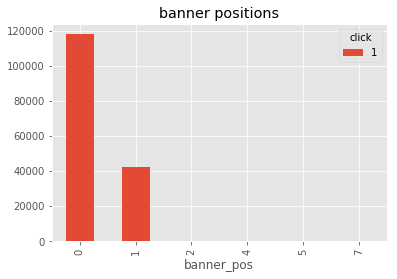

In [444]:
banner_temp =train_data_clicks[['banner_pos','click']].groupby(['banner_pos','click'])
banner_temp.size().unstack().plot(kind='bar',stacked=True, title='banner positions')

In [445]:
train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().sort_values('click',ascending=False)

,click
banner_pos,
0,117850
1,42169
5,137
2,47
7,9
4,7


In [446]:
banner = pd.DataFrame()

In [447]:
banner['position'] = train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['banner_pos']

In [448]:
banner['pos_clicks'] = train_data_clicks[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['click']

In [449]:
banner['total_impressions'] = train_data[['banner_pos','click']].groupby(['banner_pos']).count().reset_index().sort_values('click',ascending=False)['click']

In [450]:
banner['click_pct'] = 100*banner['pos_clicks']/banner['total_impressions']
banner

,position,pos_clicks,total_impressions,click_pct
0,0,117850,777713,15.153405
1,1,42169,220187,19.151449
4,5,137,48,285.416667
2,2,47,336,13.988095
5,7,9,1563,0.575816
3,4,7,2,350.000000


In [451]:
banner.sort_values(ascending=False,by='click_pct')

,position,pos_clicks,total_impressions,click_pct
3,4,7,2,350.000000
4,5,137,48,285.416667
1,1,42169,220187,19.151449
0,0,117850,777713,15.153405
2,2,47,336,13.988095
5,7,9,1563,0.575816


In [452]:
list_of_banners = banner.sort_values(by='click_pct',ascending=False)['position'].tolist()

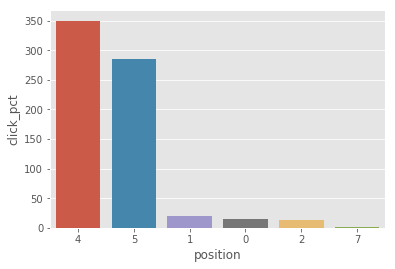

In [453]:
sns.barplot(y='click_pct',x='position'\
            ,data=banner\
            ,order=list_of_banners)

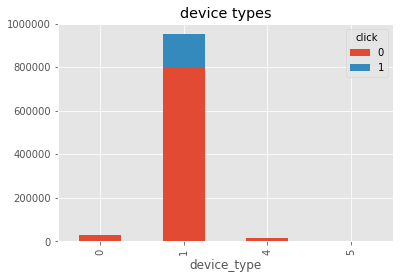

In [454]:
device_temp = train_data[['device_type','click']].groupby(['device_type','click'])
device_temp.size().unstack().plot(kind='bar',stacked=True, title='device types')

In [455]:
train_data[['device_type','click']].groupby(['device_type']).count().sort_values('click',ascending=False)

,click
device_type,
1,950292
0,31219
4,17193
5,1295


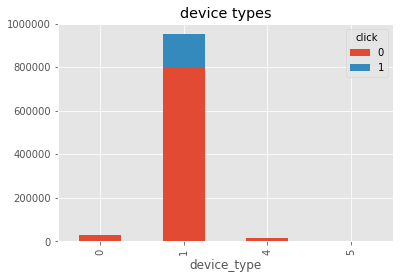

In [456]:
train_data[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar',stacked=True, title='device types')

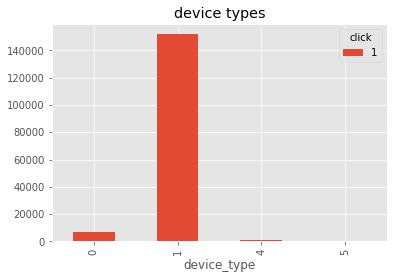

In [457]:
train_data_clicks[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar',stacked=True, title='device types')

In [458]:
train_data_clicks[['device_type','click']].groupby(['device_type']).count().sort_values('click',ascending=False)

,click
device_type,
1,151707
0,7124
4,1284
5,104


In [459]:
device_1=train_data_clicks[train_data_clicks['device_type']==1]

In [460]:
device_1

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,hour_in_day,weekday,day_name
8,1.000095e+19,1,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,-1,79,0,1,Tuesday
23,1.000477e+19,1,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,-1,79,0,1,Tuesday
27,1.000561e+19,1,2014-10-21 00:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,...,320,50,2480,3,297,100111,61,0,1,Tuesday
32,1.000649e+19,1,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,100083,79,0,1,Tuesday
37,1.000696e+19,1,2014-10-21 00:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,320,50,2161,0,35,100034,157,0,1,Tuesday
39,1.000716e+19,1,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,-1,79,0,1,Tuesday
46,1.000794e+19,1,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,-1,79,0,1,Tuesday
50,1.000970e+19,1,2014-10-21 00:00:00,1005,0,4dd0a958,79cf0c8d,f028772b,ecad2386,7801e8d9,...,320,50,2333,0,39,-1,157,0,1,Tuesday
52,1.000991e+19,1,2014-10-21 00:00:00,1005,0,85f751fd,c4e18dd6,50e219e0,a079ef6b,2347f47a,...,320,50,2161,0,35,100131,157,0,1,Tuesday
53,1.001045e+19,1,2014-10-21 00:00:00,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,100084,79,0,1,Tuesday


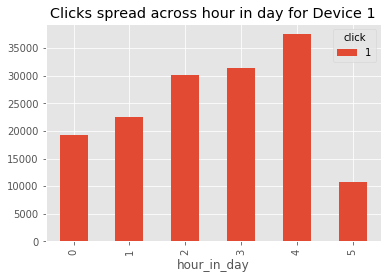

In [461]:
temp_device = device_1.groupby(['hour_in_day', 'click'])

temp_device.size().unstack().plot(kind='bar', stacked=True, title="Clicks spread across hour in day for Device 1")

In [462]:
dev_type_df_clicks=pd.DataFrame()

In [463]:
dev_type_df_clicks = train_data_clicks.groupby('device_type').agg({'click':'sum'}).reset_index()

In [464]:
dev_type_df_clicks

,device_type,click
0,0,7124
1,1,151707
2,4,1284
3,5,104


In [465]:
dev_type_df_imp = train_data.groupby('device_type').agg({'click':'count'}).reset_index()

In [466]:
dev_type_df_imp

,device_type,click
0,0,31219
1,1,950292
2,4,17193
3,5,1295


In [467]:
dev_type_df_clicks['total_impressions'] = dev_type_df_imp['click']


In [468]:
dev_type_df_clicks

,device_type,click,total_impressions
0,0,7124,31219
1,1,151707,950292
2,4,1284,17193
3,5,104,1295


In [469]:
dev_type_df_clicks['success %'] = (dev_type_df_clicks['click']/dev_type_df_clicks['total_impressions'])*100

dev_type_df_clicks

,device_type,click,total_impressions,success %
0,0,7124,31219,22.819437
1,1,151707,950292,15.964251
2,4,1284,17193,7.468156
3,5,104,1295,8.030888


In [470]:
dev_type_df_imp.columns = ['device_type', 'click_both']

In [471]:
dev_type_df_imp.columns

Index(['device_type', 'click_both'], dtype='object')

In [472]:
merged_df = pd.merge(left = dev_type_df_clicks , right = dev_type_df_imp,
                    how = 'inner', on = 'device_type')

In [473]:
merged_df

,device_type,click,total_impressions,success %,click_both
0,0,7124,31219,22.819437,31219
1,1,151707,950292,15.964251,950292
2,4,1284,17193,7.468156,17193
3,5,104,1295,8.030888,1295


In [474]:
app_features = ['app_id', 'app_domain', 'app_category']

In [475]:
type(app_features)

list

In [476]:
train_data.groupby('app_category').agg({'click':'sum'}).sort_values(by='click',ascending = False)

,click
app_category,
07d7df22,129412
0f2161f8,23167
f95efa07,4103
8ded1f7a,1779
cef3e649,1134
d1327cf5,216
75d80bbe,110
09481d60,76
dc97ec06,75


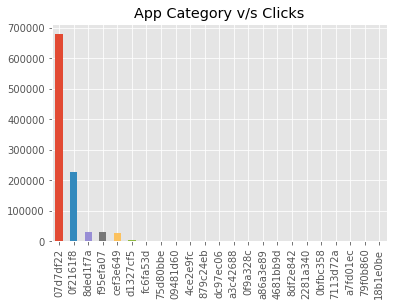

In [477]:
train_data['app_category'].value_counts().plot(kind='bar', title='App Category v/s Clicks')

In [478]:
train_app_category = train_data.groupby(['app_category', 'click']).size().unstack()

In [479]:
train_app_category

click,0,1
app_category,,
07d7df22,550457.0,129412.0
09481d60,1032.0,76.0
0bfbc358,14.0,NaN
0f2161f8,202622.0,23167.0
0f9a328c,137.0,10.0
18b1e0be,1.0,1.0
2281a340,25.0,NaN
4681bb9d,45.0,9.0
4ce2e9fc,889.0,54.0


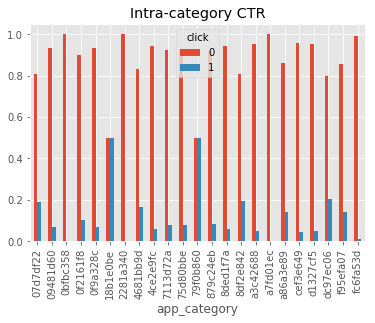

In [480]:
train_app_category.div(train_app_category.sum(axis=1), axis=0).plot(kind='bar', stacked=False, title="Intra-category CTR")

In [481]:
C_features = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18',
            'C20', 'C21']

train_data[C_features].astype('object').describe()

,C1,C14,C15,C16,C17,C18,C20,C21
count,999999,999999,999999,999999,999999,999999,999999,999999
unique,7,606,8,9,162,4,161,35
top,1005,21611,320,50,1722,0,-1,79
freq,935851,83055,953429,957005,256389,425079,545389,256389


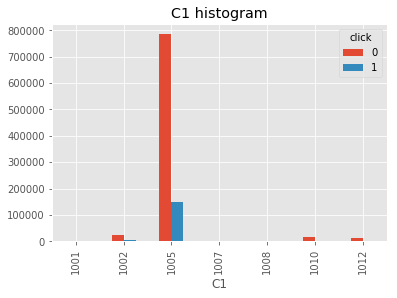

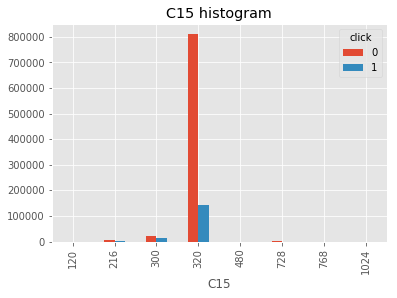

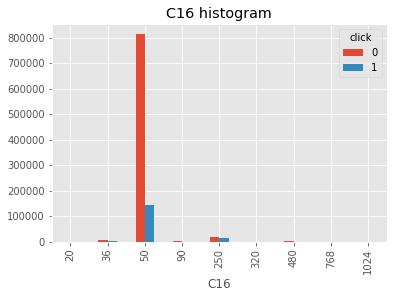

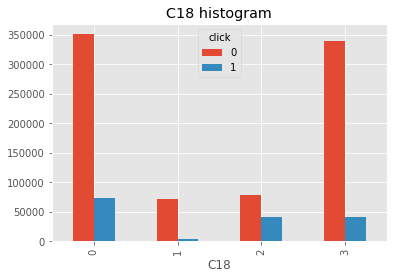

In [482]:
train_data.groupby(['C1', 'click']).size().unstack().plot(kind='bar', stacked=False, title='C1 histogram')
train_data.groupby(['C15', 'click']).size().unstack().plot(kind='bar', stacked=False, title='C15 histogram')
train_data.groupby(['C16', 'click']).size().unstack().plot(kind='bar', stacked=False, title='C16 histogram')
train_data.groupby(['C18', 'click']).size().unstack().plot(kind='bar', stacked=False, title='C18 histogram')

In [483]:
model_features = ['weekday', 'hour_in_day',
                  'banner_pos', 'site_category',
                  'device_conn_type', 'app_category',
                  'device_type']

In [484]:
model_target = 'click'

In [485]:
train_data.shape

(999999, 27)

In [486]:
train_model = train_data[model_features+[model_target]].sample(frac=0.1,random_state=42)

In [487]:
train_model.shape

(100000, 8)

In [488]:
def one_hot_features(data_frame, feature_set):
    new_data_frame = pd.get_dummies(data_frame,
                                     columns = feature_set,
                                    sparse = True)

    return new_data_frame

In [489]:
train_model = one_hot_features(train_model,
                                ['site_category',
                                 'app_category',
                                 'banner_pos'])

In [490]:
train_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C15,C16,C17,C18,C19,C20,C21,hour_in_day,weekday,day_name
0,1.000009e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,-1,79,0,1,Tuesday
1,1.000017e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,100084,79,0,1,Tuesday
2,1.000037e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,100084,79,0,1,Tuesday
3,1.000064e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,320,50,1722,0,35,100084,79,0,1,Tuesday
4,1.000068e+19,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,320,50,2161,0,35,-1,157,0,1,Tuesday


In [491]:
model_features = np.array(train_model.columns[train_model.columns!=model_target].tolist())

In [492]:
model_features.shape

(51,)

In [493]:
from sklearn.model_selection import train_test_split

In [494]:
x_train, x_test, y_train, y_test = train_test_split(
    train_model[model_features].values,
    train_model[model_target].values,
    test_size=0.3,
    random_state=42
)

In [495]:
x_train.shape

(70000, 51)

In [496]:
x_test.shape

(30000, 51)

In [497]:
y_train.shape

(70000,)

In [498]:
y_test.shape

(30000,)

In [499]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score

In [500]:
num_splits = 3
c_values = np.logspace(-3,0,7)

In [501]:
stratified_k_fold = StratifiedKFold(n_splits=num_splits)

scores = np.zeros(7)
nr_params = np.zeros(7)

In [502]:
for train_data, valid_data in stratified_k_fold.split(x_train,
                                                      y_train):
    for i, c in enumerate(np.logspace(-3, 0, 7)):
        lr_classify = LogisticRegression(penalty='l1',
                                         class_weight='balanced',
                                         C = c)
        lr_classify.fit(x_train[train_data],
                        y_train[train_data])

        #validation_Set evaluation

        y_prediction = lr_classify.predict(x_train[valid_data])
        score_f1 = f1_score(y_train[valid_data],
                            y_prediction, average='weighted' )

        scores[i] += score_f1 / num_splits

        ### spot the selected parameters ##

        model_selected = SelectFromModel(lr_classify, prefit=True)
        nr_params[i] += np.sum(model_selected.get_support()) / num_splits

Text(0,0.5,'Avg F1 score')

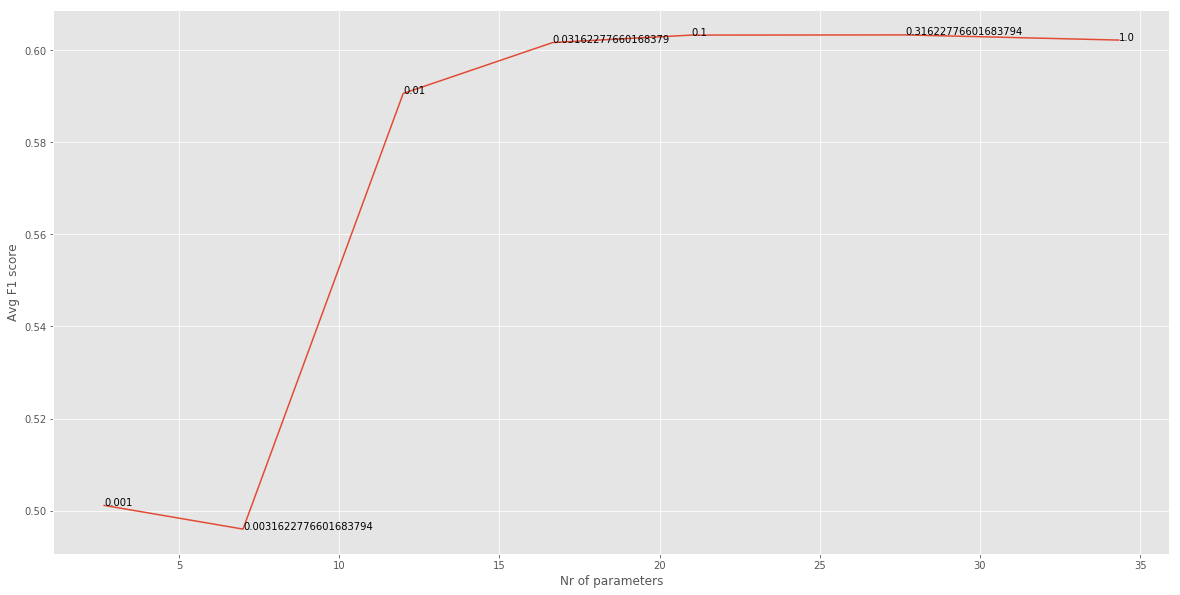

In [503]:
plt.figure(figsize=(20, 10))
plt.plot(nr_params, scores)

for i, c in enumerate(c_values):
    plt.annotate(c, (nr_params[i], scores[i]))
plt.xlabel("Nr of parameters")
plt.ylabel("Avg F1 score")

In [504]:
lr_classify = LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [505]:
lr_classify.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [506]:
model_selected = SelectFromModel(lr_classify,
                                 prefit=True )

In [507]:
pruned_params = model_selected.get_support()
pruned_params.shape

(51,)

In [508]:
model_features = model_features[pruned_params]

x_train = x_train[:, pruned_params]

x_test = x_test[:, pruned_params]

In [509]:
x_train.shape

(70000, 23)

In [510]:
x_test.shape

(30000, 23)

In [511]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [512]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train,
    y_train,
    stratify=y_train,
    test_size=0.1,
    random_state=42)

In [513]:
model = XGBClassifier()
xgb_clf = model

In [514]:
xgb_clf.fit(x_train, y_train, early_stopping_rounds=10,
            eval_metric="logloss", eval_set=[(x_valid, y_valid)])

[0]	validation_0-logloss:0.648422
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.611931
[2]	validation_0-logloss:0.581933
[3]	validation_0-logloss:0.557082
[4]	validation_0-logloss:0.536403
[5]	validation_0-logloss:0.519112
[6]	validation_0-logloss:0.504612
[7]	validation_0-logloss:0.492447
[8]	validation_0-logloss:0.482223
[9]	validation_0-logloss:0.473389
[10]	validation_0-logloss:0.466111
[11]	validation_0-logloss:0.460009
[12]	validation_0-logloss:0.454899
[13]	validation_0-logloss:0.450346
[14]	validation_0-logloss:0.446651
[15]	validation_0-logloss:0.44364
[16]	validation_0-logloss:0.441058
[17]	validation_0-logloss:0.438854
[18]	validation_0-logloss:0.436808
[19]	validation_0-logloss:0.435015
[20]	validation_0-logloss:0.433556
[21]	validation_0-logloss:0.432335
[22]	validation_0-logloss:0.431366
[23]	validation_0-logloss:0.429812
[24]	validation_0-logloss:0.428493
[25]	validation_0-logloss:0.427768
[26]	validation_0-logloss:0.42713

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [515]:
y_pred = xgb_clf.predict(x_test)
predictions = [round(value) for value in y_pred]

C:\Users\bdhooda\AppData\Local\conda\conda\envs\dfhdfh\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [516]:
print(classification_report(y_test,
                            predictions))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91     25109
          1       0.00      0.00      0.00      4891

avg / total       0.70      0.84      0.76     30000



C:\Users\bdhooda\AppData\Local\conda\conda\envs\dfhdfh\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [517]:
from sklearn import metrics

print(round(metrics.accuracy_score(y_test, predictions)*100))
print(metrics.confusion_matrix(y_test, predictions))
print(metrics.roc_auc_score(y_test, predictions))

84.0
[[25109     0]
 [ 4891     0]]
0.5


In [518]:
import pickle
filename = 'xgb_mod.sav'
filename2 = 'logistic.sav'
pickle.dump(xgb_clf,open(filename, 'wb' ))
pickle.dump(lr_classify, open(filename2, 'wb'))